In [1]:
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5
From (redirected): https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5&confirm=t&uuid=d1acf248-bbad-4ab9-8f05-8240ad5dc5b1
To: /content/horse-or-human.zip
100% 150M/150M [00:04<00:00, 29.9MB/s]


In [2]:
import os
import zipfile

loacl_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(loacl_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [3]:
train_horse_dir = os.path.join('./horse-or-human/horses')
train_human_dir = os.path.join('./horse-or-human/humans')

In [4]:
train_horse_name = os.listdir(train_horse_dir)
print(train_horse_name[:10])

train_human_name = os.listdir(train_human_dir)
print(train_human_name[:10])

['horse03-2.png', 'horse11-4.png', 'horse25-6.png', 'horse24-7.png', 'horse06-9.png', 'horse18-2.png', 'horse25-5.png', 'horse04-9.png', 'horse15-2.png', 'horse40-5.png']
['human14-15.png', 'human07-01.png', 'human13-12.png', 'human03-23.png', 'human17-24.png', 'human06-26.png', 'human10-26.png', 'human05-00.png', 'human05-17.png', 'human11-18.png']


In [5]:
print('total horse images:', len(os.listdir(train_horse_dir)))
print('total human images:', len(os.listdir(train_human_dir)))

total horse images: 500
total human images: 527


In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

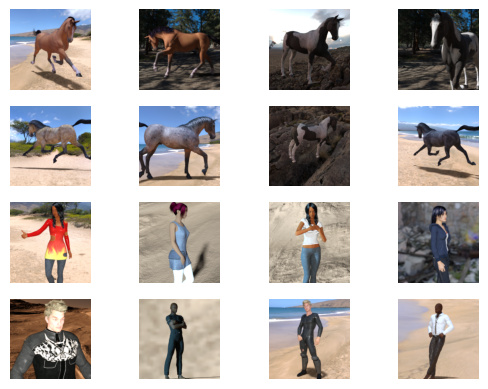

In [7]:
pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_name[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_name[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp  = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [8]:
import tensorflow as tf

In [9]:
model = tf.keras.models.Sequential([
    # first Layer
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Second layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Third layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Fourth layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Fifth layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten Layer
    tf.keras.layers.Flatten(),
    # Hidden Layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Output Layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 298, 298, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 149, 149, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 147, 147, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 33, 33, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,606,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,704,097 (6.50 MB)

 Trainable params: 1,704,097 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# all images are rescale by /
train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        '/content/horse-or-human',
        target_size=(300, 300), # all images will be resized to 150*150
        batch_size=128,
        # we use binary crss entropy so we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [13]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np



# Define a callback to stop training if accuracy reaches a certain threshold
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()


# Update the training parameters
history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=15,  # Increased epochs for potential better accuracy
      verbose=1,
      callbacks=[callbacks]
)



Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 126s 14s/step - accuracy: 0.4981 - loss: 0.9994
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6667 - loss: 0.6510  
Epoch 3/15


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


8/8 ━━━━━━━━━━━━━━━━━━━━ 114s 13s/step - accuracy: 0.5476 - loss: 0.7085
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8203 - loss: 0.6589 
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 97s 11s/step - accuracy: 0.6316 - loss: 0.6271
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.5547 - loss: 0.6684 
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 141s 12s/step - accuracy: 0.7833 - loss: 0.5937
Epoch 8/15
1/8 ━━━━━━━━━━━━━━━━━━━━ 3s 440ms/step - accuracy: 1.0000 - loss: 0.5667
Reached 99% accuracy so cancelling training!
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.5667  


In [14]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving OIP (2).jpeg to OIP (2) (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
[1.]
OIP (2) (1).jpeg is a human
